In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
data_dir = './data/'

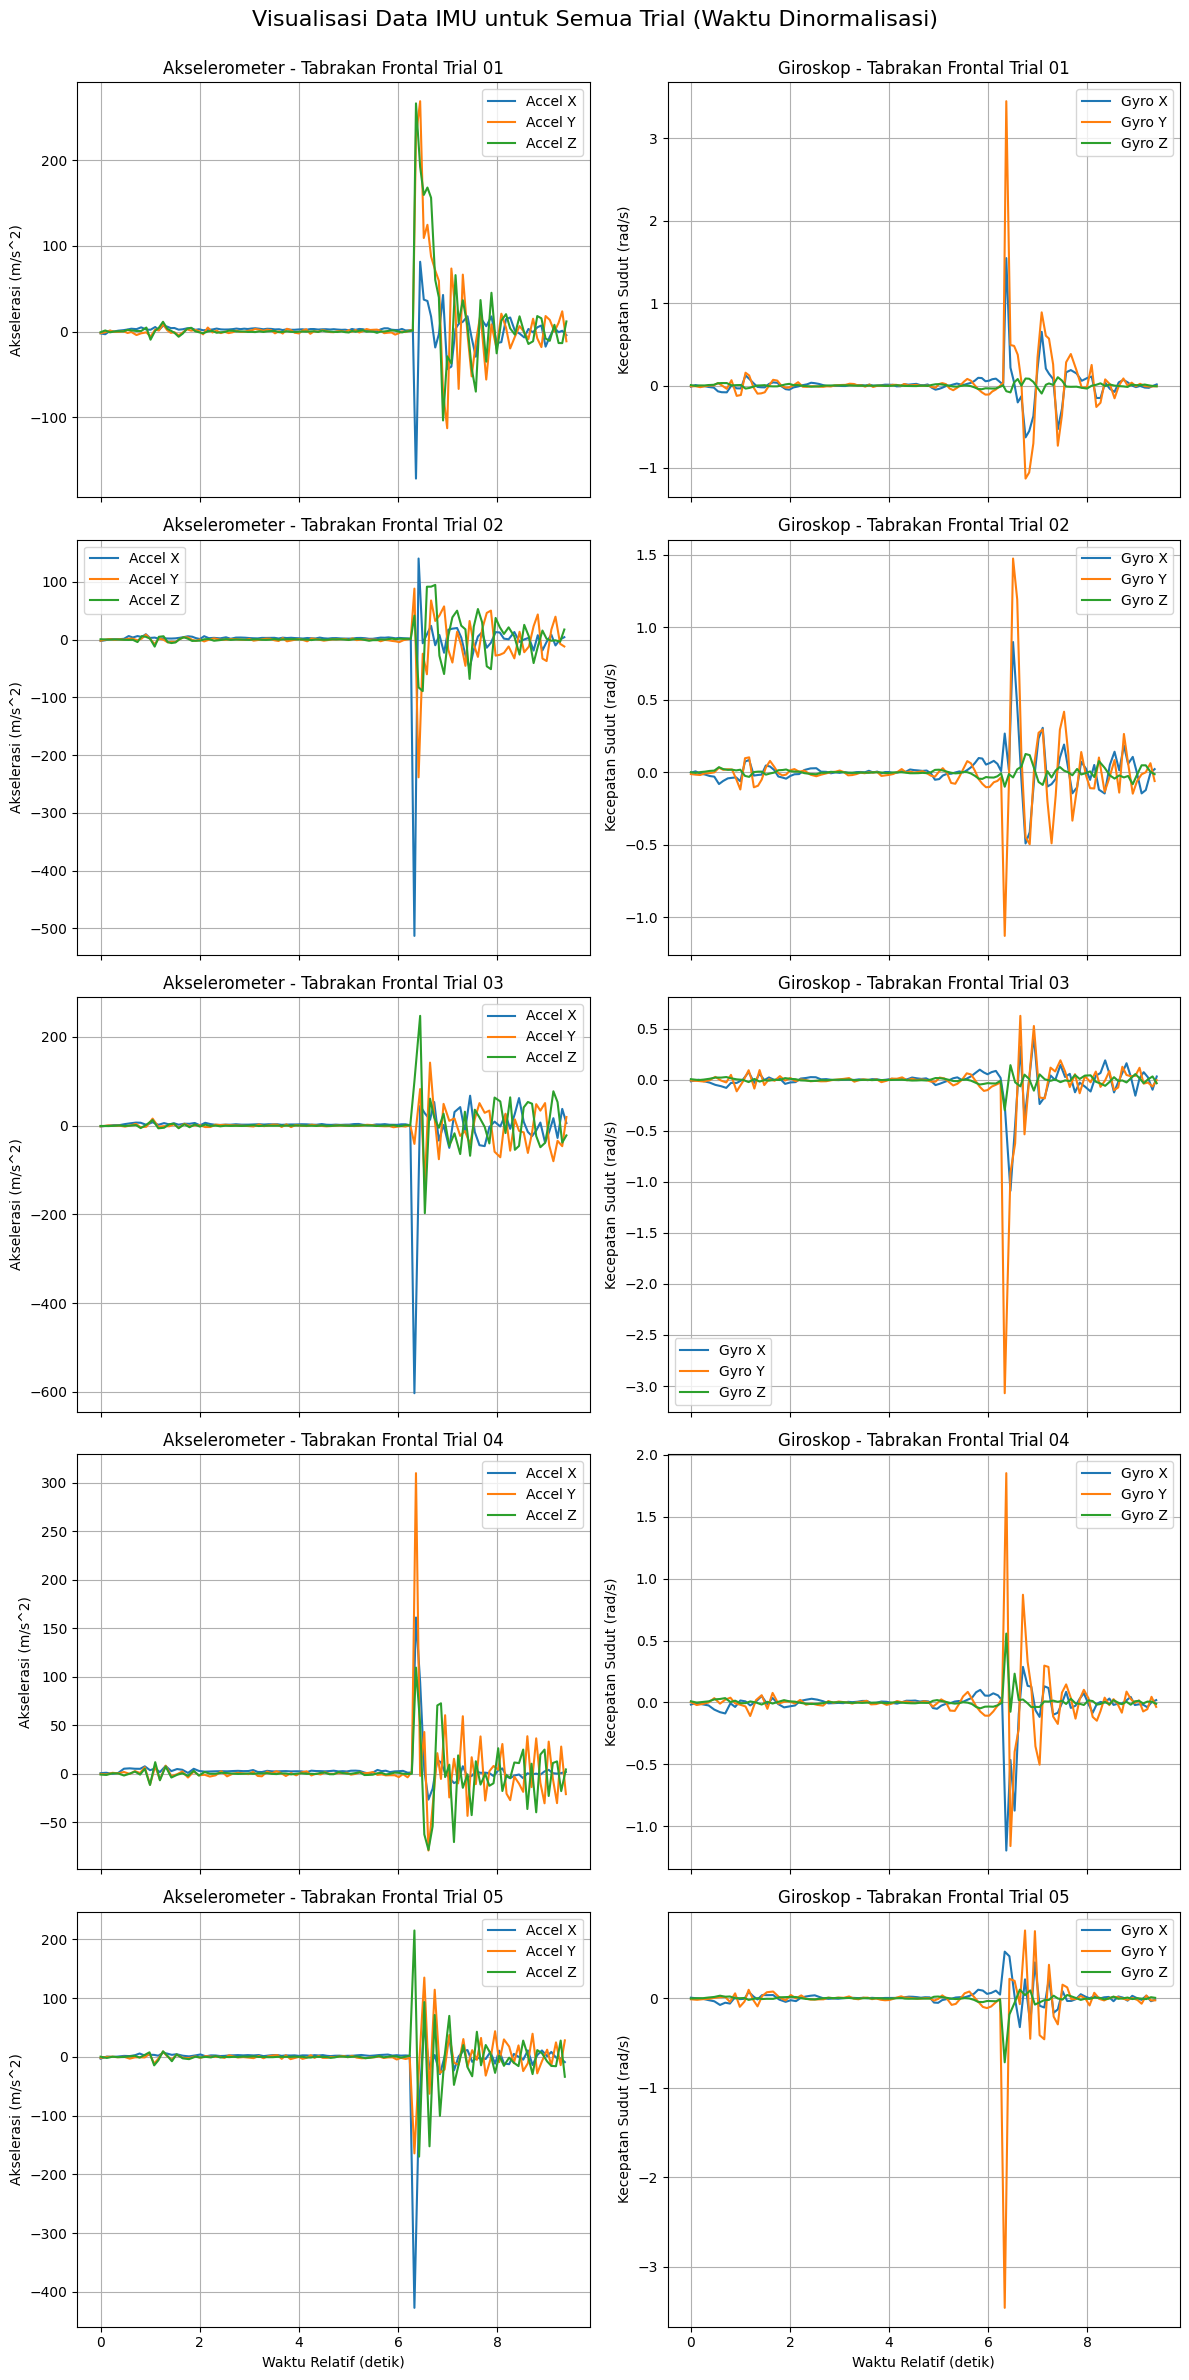

In [9]:
# Memastikan direktori ada sebelum melanjutkan
if not os.path.isdir(data_dir):
    print(f"Error: Direktori '{data_dir}' tidak ditemukan.")
else:
    # Mendapatkan daftar semua file CSV di direktori data
    file_list = [f for f in os.listdir(data_dir) if f.endswith('.csv') and f.startswith('tabrakan_frontal_trial')]
    file_list.sort() # Mengurutkan file

    if not file_list:
        print(f"Tidak ada file CSV yang cocok ditemukan di direktori '{data_dir}'.")
    else:
        # Membuat subplot sebanyak jumlah file yang ditemukan
        num_files = len(file_list)
        # squeeze=False memastikan 'axes' selalu menjadi array 2D
        fig, axes = plt.subplots(num_files, 2, figsize=(12, 5 * num_files), sharex=True, squeeze=False)

        fig.suptitle('Visualisasi Data IMU untuk Semua Trial (Waktu Dinormalisasi)', fontsize=16)

        for i, filename in enumerate(file_list):
            # MEMBUAT PATH LENGKAP KE FILE
            full_path = os.path.join(data_dir, filename)
            
            # Membaca file CSV dari path yang sudah lengkap
            df = pd.read_csv(full_path)

            # Normalisasi waktu
            if not df.empty:
                df['time'] = df['time'] - df['time'].iloc[0]

            trial_name = filename.replace('.csv', '').replace('_', ' ').title()

            # Plot Akselerometer
            ax1 = axes[i][0]
            ax1.plot(df['time'], df['accelX'], label='Accel X')
            ax1.plot(df['time'], df['accelY'], label='Accel Y')
            ax1.plot(df['time'], df['accelZ'], label='Accel Z')
            ax1.set_title(f'Akselerometer - {trial_name}')
            ax1.set_ylabel('Akselerasi (m/s^2)')
            ax1.legend()
            ax1.grid(True)

            # Plot Giroskop
            ax2 = axes[i][1]
            ax2.plot(df['time'], df['gyroX'], label='Gyro X')
            ax2.plot(df['time'], df['gyroY'], label='Gyro Y')
            ax2.plot(df['time'], df['gyroZ'], label='Gyro Z')
            ax2.set_title(f'Giroskop - {trial_name}')
            ax2.set_ylabel('Kecepatan Sudut (rad/s)')
            ax2.legend()
            ax2.grid(True)

        # Menambahkan label X umum
        axes[-1][0].set_xlabel('Waktu Relatif (detik)')
        axes[-1][1].set_xlabel('Waktu Relatif (detik)')

        # Merapikan dan menyimpan
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
        plt.savefig('grafik_semua_data_imu.png')
